## Cargar los datos

In [56]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

input_file_smart = '../simulation_results/smart_matrix.json'
input_file_standard = '../simulation_results/standard_matrix.json'

with open(input_file_smart, 'r') as f:
    data_smart = json.load(f)
with open(input_file_standard, 'r') as f:
    data_standard = json.load(f)
    
df_smart = []
for i in data_smart: 
    df_cars = pd.DataFrame({"cars_delay": i['cars_delay'], "cars_semaphone_delay": i['cars_semaphore_delay']})
    df_walkers = pd.DataFrame({"walkers_delay": i['walkers_delay'], "walkers_semaphore_delay": i['walkers_semaphore_delay']})
    df_smart.append([df_cars, df_walkers])

df_standard = []
for i in data_standard: 
    df_cars = pd.DataFrame({"cars_delay": i['cars_delay'], "cars_semaphone_delay": i['cars_semaphore_delay']})
    df_walkers = pd.DataFrame({"walkers_delay": i['walkers_delay'], "walkers_semaphore_delay": i['walkers_semaphore_delay']})
    df_standard.append([df_cars, df_walkers])

In [22]:
pd.set_option('display.float_format', '{:.3f}'.format)
for i in df_smart:
    print(i[0].describe())

       cars_delay  cars_semaphone_delay
count     339.000               339.000
mean      711.198               423.584
std       709.072               430.276
min         1.000                 0.000
25%       253.000               139.000
50%       536.000               316.000
75%       883.500               545.500
max      6308.000              3741.000
       cars_delay  cars_semaphone_delay
count     313.000               313.000
mean      740.652               444.259
std       649.189               399.040
min         3.000                 0.000
25%       274.000               158.000
50%       578.000               343.000
75%      1033.000               611.000
max      5573.000              3442.000
       cars_delay  cars_semaphone_delay
count     349.000               349.000
mean      762.287               458.788
std       700.777               432.340
min         5.000                 0.000
25%       256.000               151.000
50%       533.000               323.000


In [6]:
pd.set_option('display.float_format', '{:.3f}'.format)
df_walkers.describe()

,walkers_delay,walkers_semaphore_delay
count,1063.000,1063.000
mean,300.638,66.165
std,214.683,51.977
min,1.000,0.000
25%,149.000,28.000
50%,254.000,55.000
75%,387.500,92.500
max,2206.000,478.000


## Mostrar histograma con los datos

In [ ]:
for i in range(np.max([len(df_smart), len(df_standard)])):
    df_cars_smart = df_smart[i][0]
    df_cars_standard = df_standard[i][0]
    columns_to_plot = [col for col in df_cars.columns]
    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, len(columns_to_plot)*3))

    for i, col in enumerate(columns_to_plot):
        # df_cars_smart[col].hist(bins=30, ax=axes[i])
        # df_cars_standard[col].hist(bins=30, ax=axes[i], edgecolor='black')
        axes[i].hist([df_cars_smart[col], df_cars_standard[col]], bins=30, edgecolor='black')
        axes[i].legend(["smart", "standard"])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Time Frecuency')

    plt.tight_layout()

    plt.show()


plt.show()

In [ ]:
for i in range(np.max([len(df_smart), len(df_standard)])):
    df_walkers_smart = df_smart[i][1]
    df_walkers_standard = df_standard[i][1]
    columns_to_plot = [col for col in df_walkers.columns]
    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, len(columns_to_plot)*3))

    for i, col in enumerate(columns_to_plot):
        # walkers_smart[col].hist(bins=30, ax=axes[i])
        # walkers_standard[col].hist(bins=30, ax=axes[i], edgecolor='black')
        axes[i].hist([df_walkers_smart[col], df_walkers_standard[col]], bins=30, edgecolor='black')
        axes[i].legend(["smart", "standard"])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Time Frecuency')

    plt.tight_layout()

    plt.show()


plt.show()

Como podemos apreciar, ninguna de nuestras variables tiene un comportamiento normal

## Análisis de normalidad

In [ ]:
for x in df_cars.columns:
    print(f"El kurtosis de {x} es {df_cars[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df_cars[x].skew()}")
print()
for x in df_walkers.columns:
    print(f"El kurtosis de {x} es {df_walkers[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df_walkers[x].skew()}")

El kurtosis de cars_delay es 9.941143795818949
La Asimetría de cars_delay es 2.5222197882948656
El kurtosis de cars_semaphone_delay es 9.705789499444355
La Asimetría de cars_semaphone_delay es 2.497374354493005

El kurtosis de walkers_delay es nan
La Asimetría de walkers_delay es nan
El kurtosis de walkers_semaphore_delay es nan
La Asimetría de walkers_semaphore_delay es nan


### Test de Normalidad

In [ ]:
from scipy.stats import kstest, shapiro


for x in df_cars.columns:
    test = df_cars[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

for x in df_walkers.columns:
    test = df_walkers[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

cars_delay
D = 0.9999997133484281
p-value = 0.0

cars_semaphone_delay
D = 0.9786501019683699
p-value = 1.7402454649180068e-167



ValueError: a must be greater than 0 unless no samples are taken

## Matriz de Correlación

Mediante la matriz de correlación veremos la relación entre las variables y nos dará una idea de las variables a seleccionar

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargados los DataFrames df_primero y df_segundo

# Calcular la matriz de correlación
df1 = df_smart[0][0]
df2 = df_standard[0][0]
# Supongamos que tenemos dos DataFrames llamados df1 y df2
common_columns = ["cars_delay", "cars_semaphone_delay"]
print(f"Columnas comunes: {common_columns}")
# Calculamos la matriz de correlación para df1
import pandas as pd
import numpy as np

# Supongamos que tenemos dos DataFrames llamados df1 y df2
# Asegúrate de que ambas tengan las mismas columnas

# Normalizar los DataFrames para tener la misma cantidad de filas
max_rows = max(len(df1), len(df2))
df1_normalized = pd.concat([df1] * (max_rows // len(df1)), ignore_index=True)[:max_rows]
df2_normalized = pd.concat([df2] * (max_rows // len(df2)), ignore_index=True)[:max_rows]

# Asegurarnos de que las columnas sean iguales
common_columns = set(df1_normalized.columns).intersection(set(df2_normalized.columns))
print(f"Columnas comunes: {common_columns}")

# Calculamos la matriz de correlación para cada DataFrame normalizado
corr_matrix_df1 = df1_normalized[common_columns].corr()
corr_matrix_df2 = df2_normalized[common_columns].corr()

# Comparar las diagonales principales (correlación de cada columna consigo misma)
diff_diagonals = corr_matrix_df1.values.diagonal() - corr_matrix_df2.values.diagonal()

# Comparar los elementos fuera de la diagonal (correlaciones entre columnas)
off_diagonal_diff = np.abs(corr_matrix_df1.values - corr_matrix_df2.values)

# Combinar ambas diferencias en una sola matriz
combined_diff = np.stack([diff_diagonals.reshape(-1, 1), off_diagonal_diff], axis=2)

# Convertir a DataFrame
comparison_df = pd.DataFrame(combined_diff, columns=['Diagonal', 'Off-Diagonal'])

print(comparison_df)

Columnas comunes: ['cars_delay', 'cars_semaphone_delay']
Columnas comunes: {'cars_delay', 'cars_semaphone_delay'}


TypeError: Passing a set as an indexer is not supported. Use a list instead.

In [85]:
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Supongamos que tenemos dos grupos: grupo1 y grupo2
grupo1 = df_standard
grupo2 = df_smart

# Simulaciones para cada grupo
simulations_per_group = 24

# Convertir las listas de simulaciones a arrays NumPy
grupo1_array = np.array(grupo1)
grupo2_array = np.array(grupo2)

# Realizar ANOVA
model = sm.formula.fmt2('time ~ group', groups=['group'])
results = model.fit(data={'time': grupo1_array.flatten(), 'group': ['grupo1'] * len(grupo1) + ['grupo2'] * len(grupo2)})

# Obtener los resultados de ANOVA
anova_results = results.summary()

print(anova_results)

# Realizar el test post-hoc si es necesario
post_hoc = stats.tukey_hsd(grupo1_array.flatten(), grupo2_array.flatten())
print(post_hoc)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (24, 2) + inhomogeneous part.

/home/david/bin/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/david/bin/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


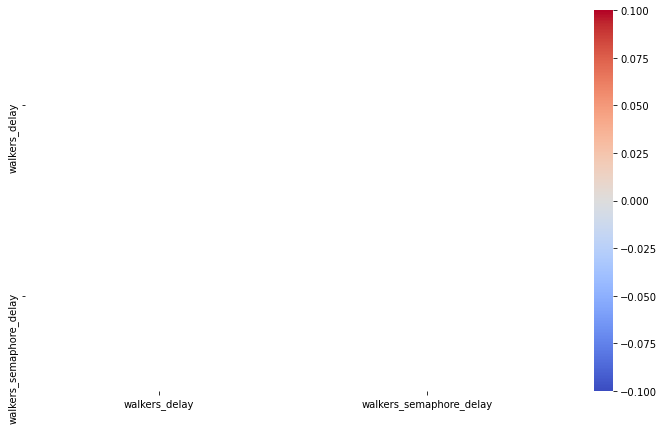

In [ ]:
correlation_matrix = df_walkers.corr()
# print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


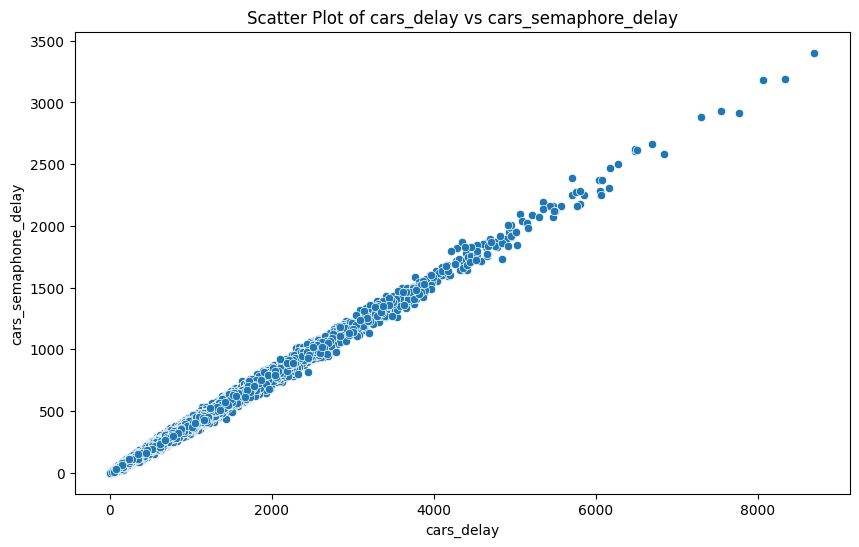

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cars_delay', y='cars_semaphone_delay', data=df_cars)
plt.title('Scatter Plot of cars_delay vs cars_semaphore_delay')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='walkers_delay', y='walkers_semaphone_delay', data=df_walkers)
plt.title('Scatter Plot of cars_delay vs cars_semaphore_delay')
plt.show()

ValueError: Could not interpret value `walkers_semaphone_delay` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

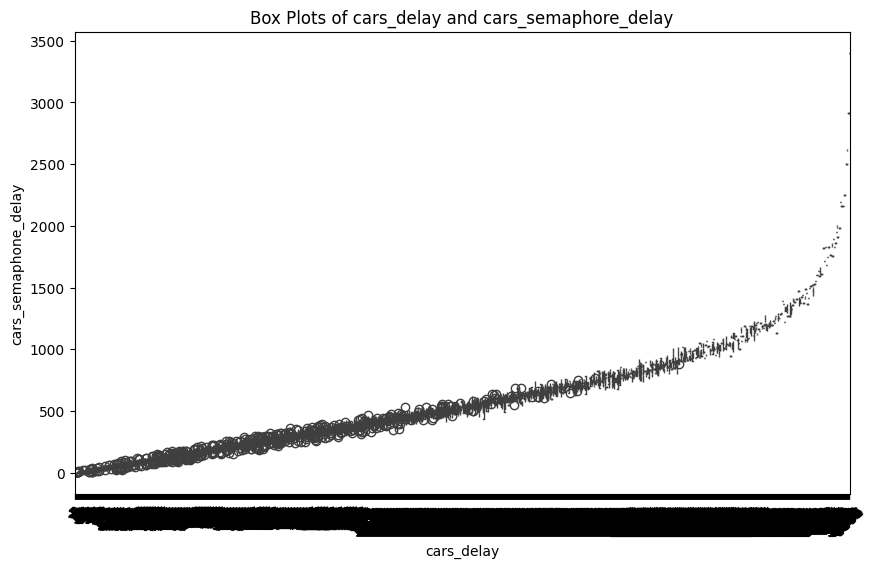

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cars, x='cars_delay', y='cars_semaphone_delay')
plt.title('Box Plots of cars_delay and cars_semaphore_delay')
plt.xticks(rotation=45)
plt.show()

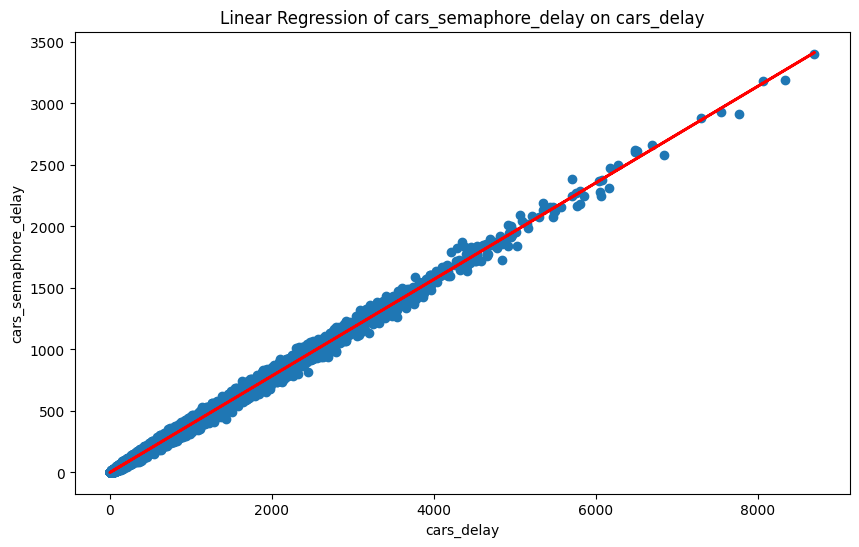

In [ ]:
# 7. Regression analysis
X = df_cars['cars_delay']
y = df_cars['cars_semaphone_delay']

# Simple linear regression
slope, intercept = np.polyfit(X, y, 1)
line = slope * X + intercept

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, line, color='red', linewidth=2)
plt.title('Linear Regression of cars_semaphore_delay on cars_delay')
plt.xlabel('cars_delay')
plt.ylabel('cars_semaphore_delay')
plt.show()

In [8]:
# 7. Regression analysis
X = df_walkers['walkers_delay']
y = df_walkers['walkers_semaphone_delay']

# Simple linear regression
slope, intercept = np.polyfit(X, y, 1)
line = slope * X + intercept

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, line, color='red', linewidth=2)
plt.title('Linear Regression of cars_semaphore_delay on cars_delay')
plt.xlabel('cars_delay')
plt.ylabel('cars_semaphore_delay')
plt.show()

KeyError: 'walkers_semaphone_delay'